# Credit Default Problem
In this notebook, we will use the customer tax records to predict whether a customer will default on their loans. 



In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
def generateSample(n, prior, meanVariances = [[-1,1],[1,1]]):
    # generate a sample of size n from the prior
    # use the mean and variance of the prior to generate the sample
    [class0Mean , class0Variance] = meanVariances[0]
    [class1Mean , class1Variance] = meanVariances[1]
    size1 = int(n * prior)
    size2 = n - size1
    class0Sample = np.random.normal(class0Mean, class0Variance, size1)
    class1Sample = np.random.normal(class1Mean, class1Variance, size2)

    # create a dataframe with the samples and the labels
    df = pd.DataFrame(np.concatenate((class0Sample, class1Sample), axis=0))

    df['label'] = np.concatenate((np.zeros(size1), np.ones(size2))).astype(int)
    
    df.columns = ['X', 'label']
    # shuffle the dataframe
    df = df.sample(frac=1).reset_index(drop=True)
    return df

In [39]:
sample = generateSample(100000, 0.8)
sample.head()

,X,label
0,-0.261121,0
1,0.259965,1
2,-1.970990,0
3,-1.330324,0
4,2.201474,1


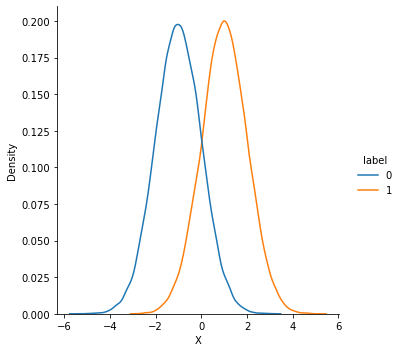

In [43]:
# lets see the synthetic data is generated as expected

# plot the distribution of the data for each class on the same plot
sns.displot(sample, x="X", hue="label", kind="kde")


## Creating a basian classifier

Here we do